In [1]:
# Import dependencies for random forest model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib

%matplotlib inline

### Loading and Preprocessing Loans Encoded Data

In [2]:
#  Import and read the loan_approval_dataset.csv.
loan_df = pd.read_csv('Resources/loan_approval_dataset.csv')
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Check for leading/trailing whitespaces in the column names
loan_df.columns = loan_df.columns.str.strip()

In [4]:
# Drop loan id as it is not beneficial 
loan_df = loan_df.drop('loan_id', axis=1)

### Separate the features `X` from the target `y`

In [5]:
# Separate the features, X,  from the target variable, y
y = loan_df['loan_status']

# Select features for X 
features_columns = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]
X = loan_df[features_columns]

In [6]:
# Preview the features data
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [7]:
# Preview the first five entries for the target variable
y[:5]

0     Approved
1     Rejected
2     Rejected
3     Rejected
4     Rejected
Name: loan_status, dtype: object

### Separate the data into training and testing subsets.

In [8]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

### Scale the data using `StandardScaler`

In [9]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### Fitting the Random Forest Model

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

### Save Model

In [12]:
# Save the model to a file
file_path = 'Models/random_forest_model_optimization.pkl'
joblib.dump(rf_model, file_path)

['Models/random_forest_model_optimization.pkl']

### Making Predictions Using the Random Forest Model

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

### Model Evaluation

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,640,11
Actual 1,14,403


Accuracy Score : 0.9765917602996255
Classification Report
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       651
    Rejected       0.97      0.97      0.97       417

    accuracy                           0.98      1068
   macro avg       0.98      0.97      0.98      1068
weighted avg       0.98      0.98      0.98      1068



### Feature Importance

In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.8237171537854284, 'cibil_score'),
 (0.06576509604125146, 'loan_term'),
 (0.02938046782535051, 'loan_amount'),
 (0.018252122218860023, 'income_annum'),
 (0.01541063979528913, 'luxury_assets_value'),
 (0.014668653413328625, 'residential_assets_value'),
 (0.013858116355869693, 'commercial_assets_value'),
 (0.012434762295716308, 'bank_asset_value'),
 (0.0065129882689059755, 'no_of_dependents')]

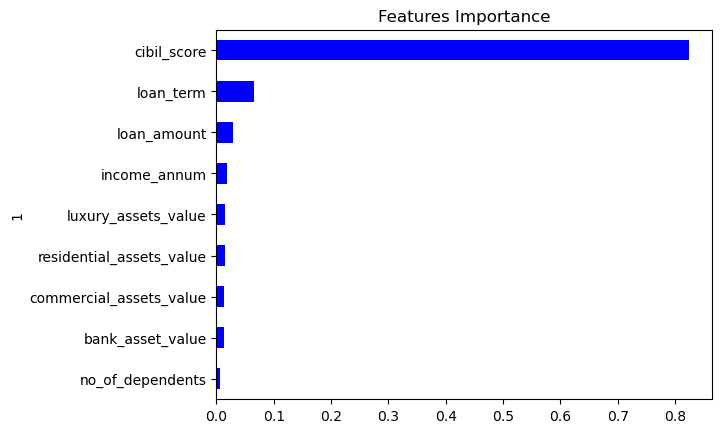

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importance', legend=False)
plt.savefig('Figures/rf_feature_importance_optimization.png')